<a href="https://colab.research.google.com/github/VarvaraZorina/Wine/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/107.7 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
userdata.get('ROBOFLOW_API_KEY')
from roboflow import Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YjaAbGo5TR3eiGO7oS51")
project = rf.workspace("varya-6wfd8").project("-ovzbr")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Вино-1 in yolov11:: 100%|██████████| 268/268 [00:00<00:00, 3844.29it/s]


!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('YjaAbGo5TR3eiGO7YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51YjaAbGo5TR3eiGO7oS51яммяYjaAbGo5TR3eiGO7oS51oS51')

rf = Roboflow(api_key="YjaAbGo5TR3eiGO7oS51")
project = rf.workspace("varya-6wfd8").project("-ovzbr")
version = project.version(1)
dataset = version.download("yolov11")
                


In [ ]:
!sed -i '$d' {/content/datasets/Вино-1/data.yaml}/data.yaml   # Delete the last line
!sed -i '$d' {/content/datasets/Вино-1/data.yaml}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {/content/datasets/Вино-1/data.yaml}/data.yaml   # Delete the third-to-last line


!echo 'test: ../test/images' >> {/content/datasets/Вино-1/test/images}/data.yaml
!echo 'train: ../train/images' >> {/content/datasets/Вино-1/train/images}/data.yaml
!echo 'val: ../valid/images' >> {/content/datasets/Вино-1/valid/images}/data.yaml

sed: can't read {/content/datasets/Вино-1/data.yaml}/data.yaml: No such file or directory
sed: can't read {/content/datasets/Вино-1/data.yaml}/data.yaml: No such file or directory
sed: can't read {/content/datasets/Вино-1/data.yaml}/data.yaml: No such file or directory
/bin/bash: line 1: {/content/datasets/Вино-1/test/images}/data.yaml: No such file or directory
/bin/bash: line 1: {/content/datasets/Вино-1/train/images}/data.yaml: No such file or directory
/bin/bash: line 1: {/content/datasets/Вино-1/valid/images}/data.yaml: No such file or directory


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 143MB/s] 
New https://pypi.org/project/ultralytics/8.3.59 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Вино-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

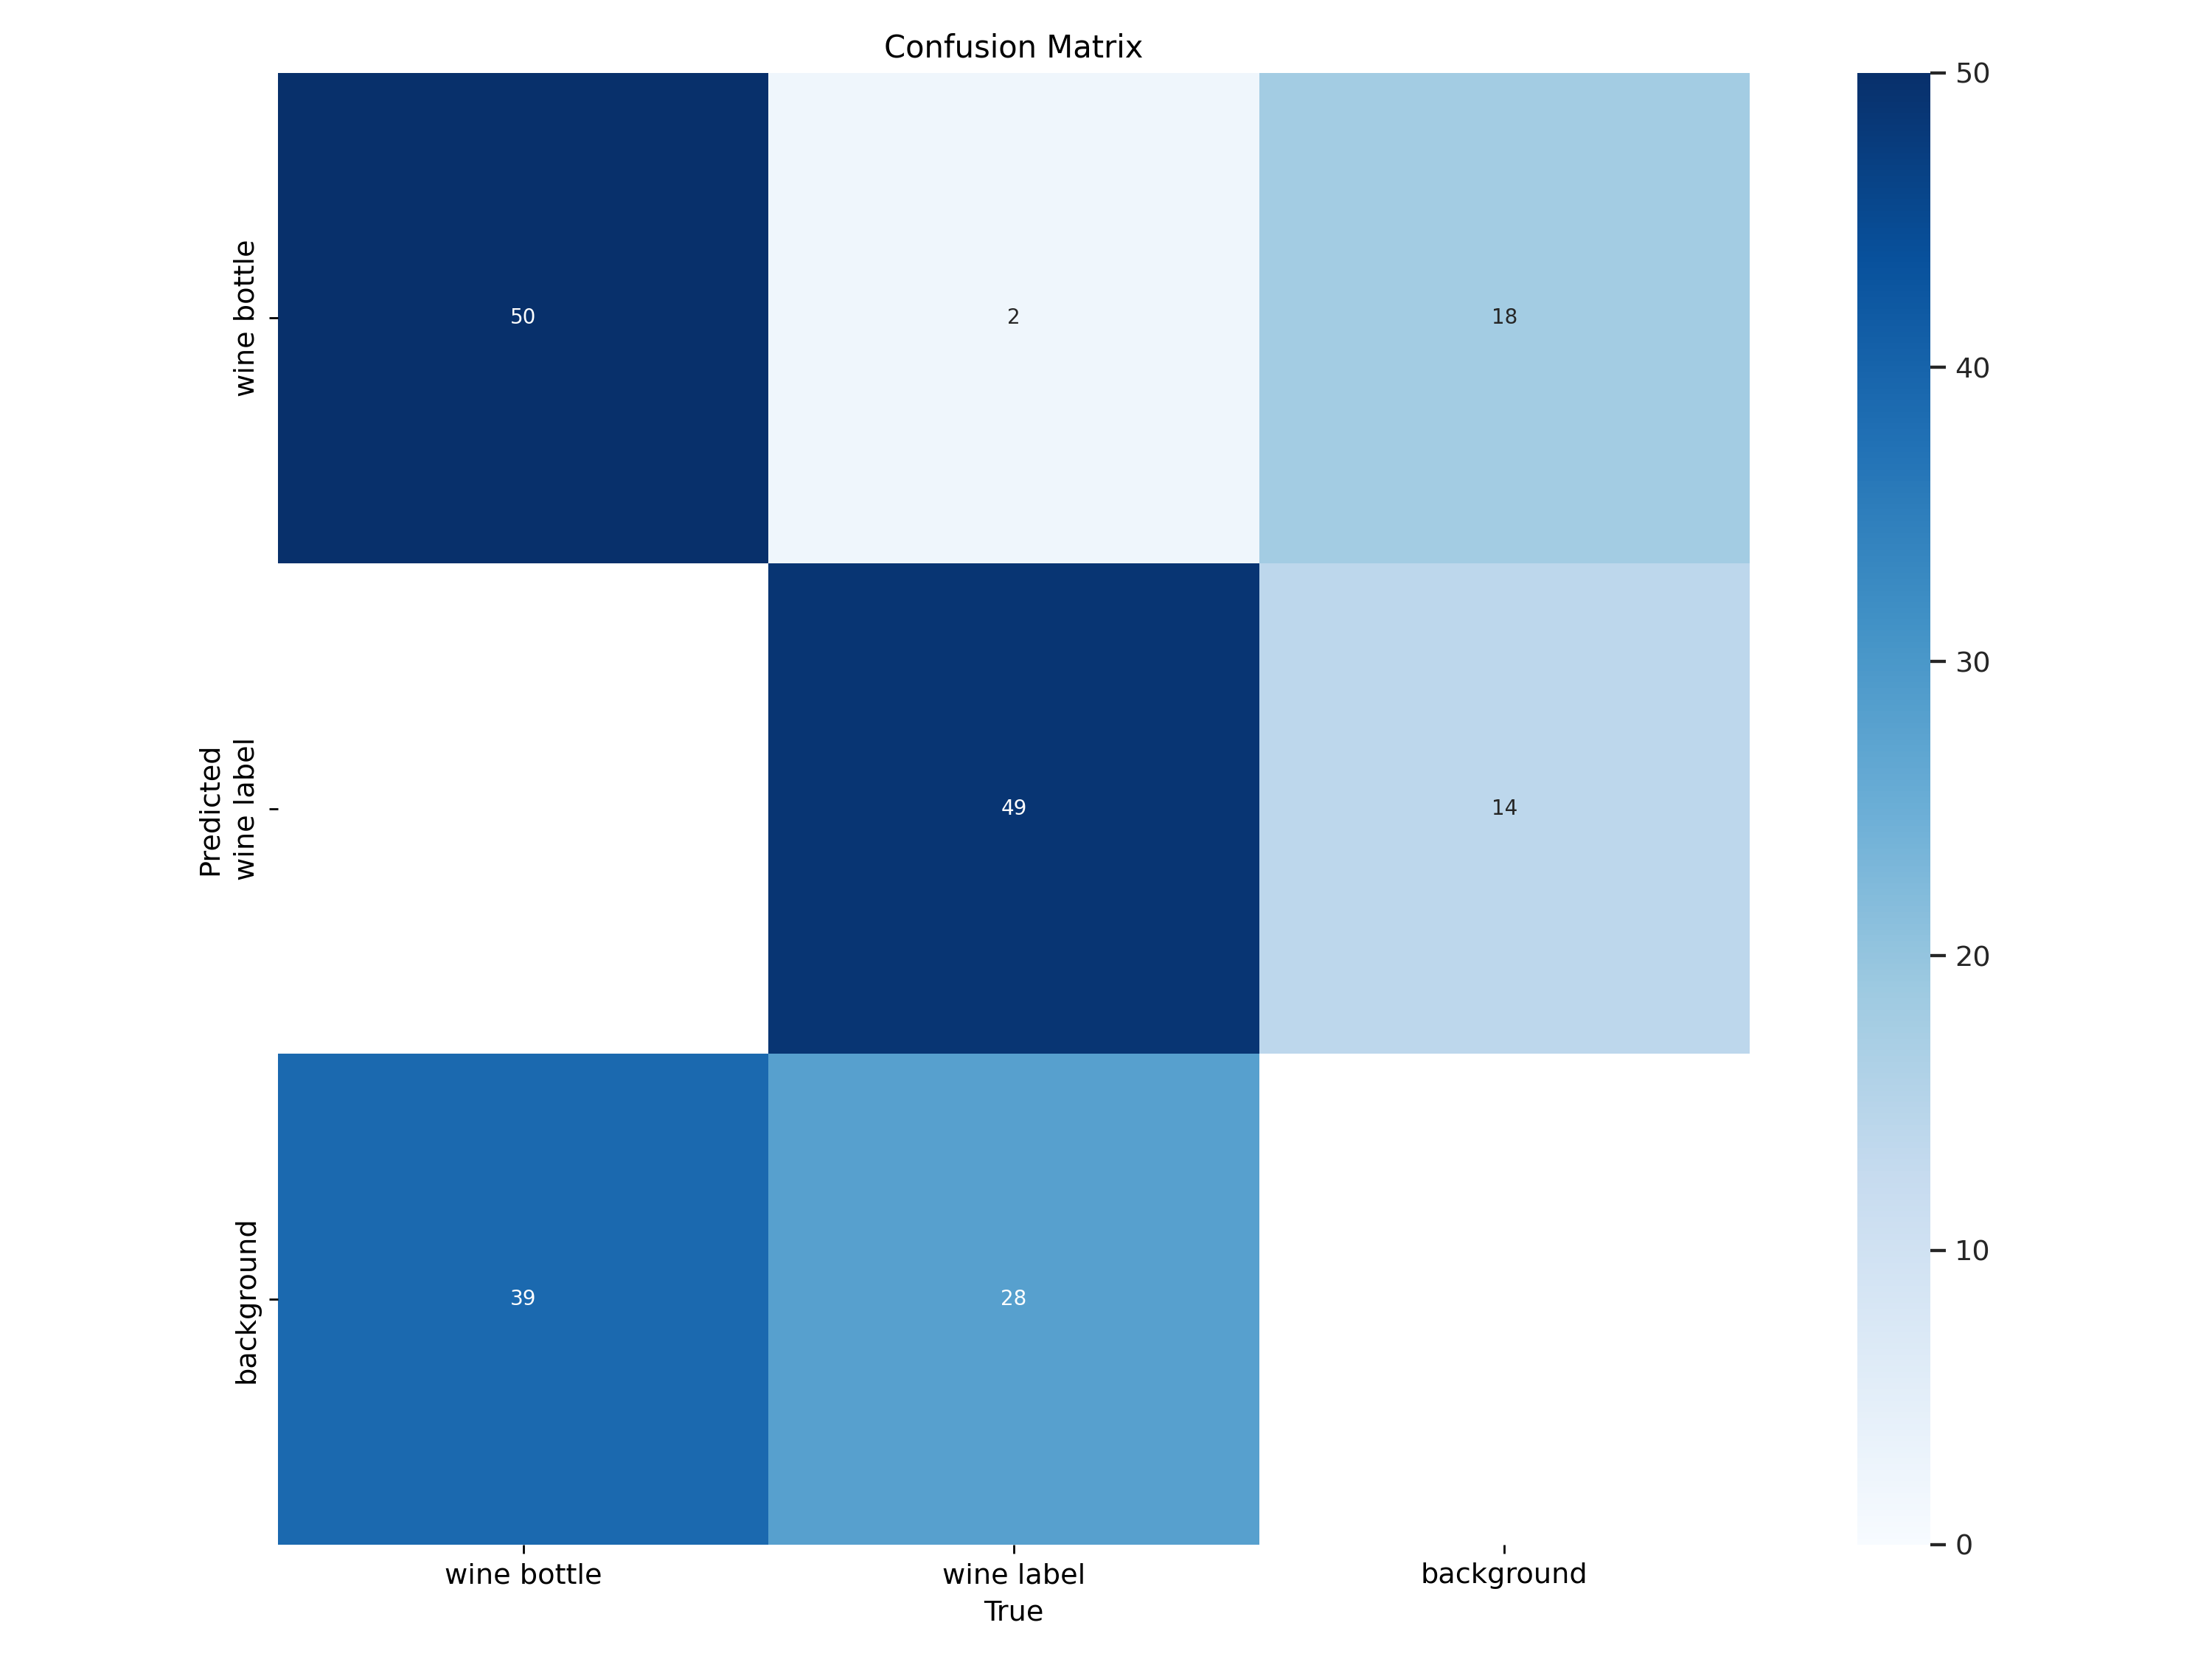

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

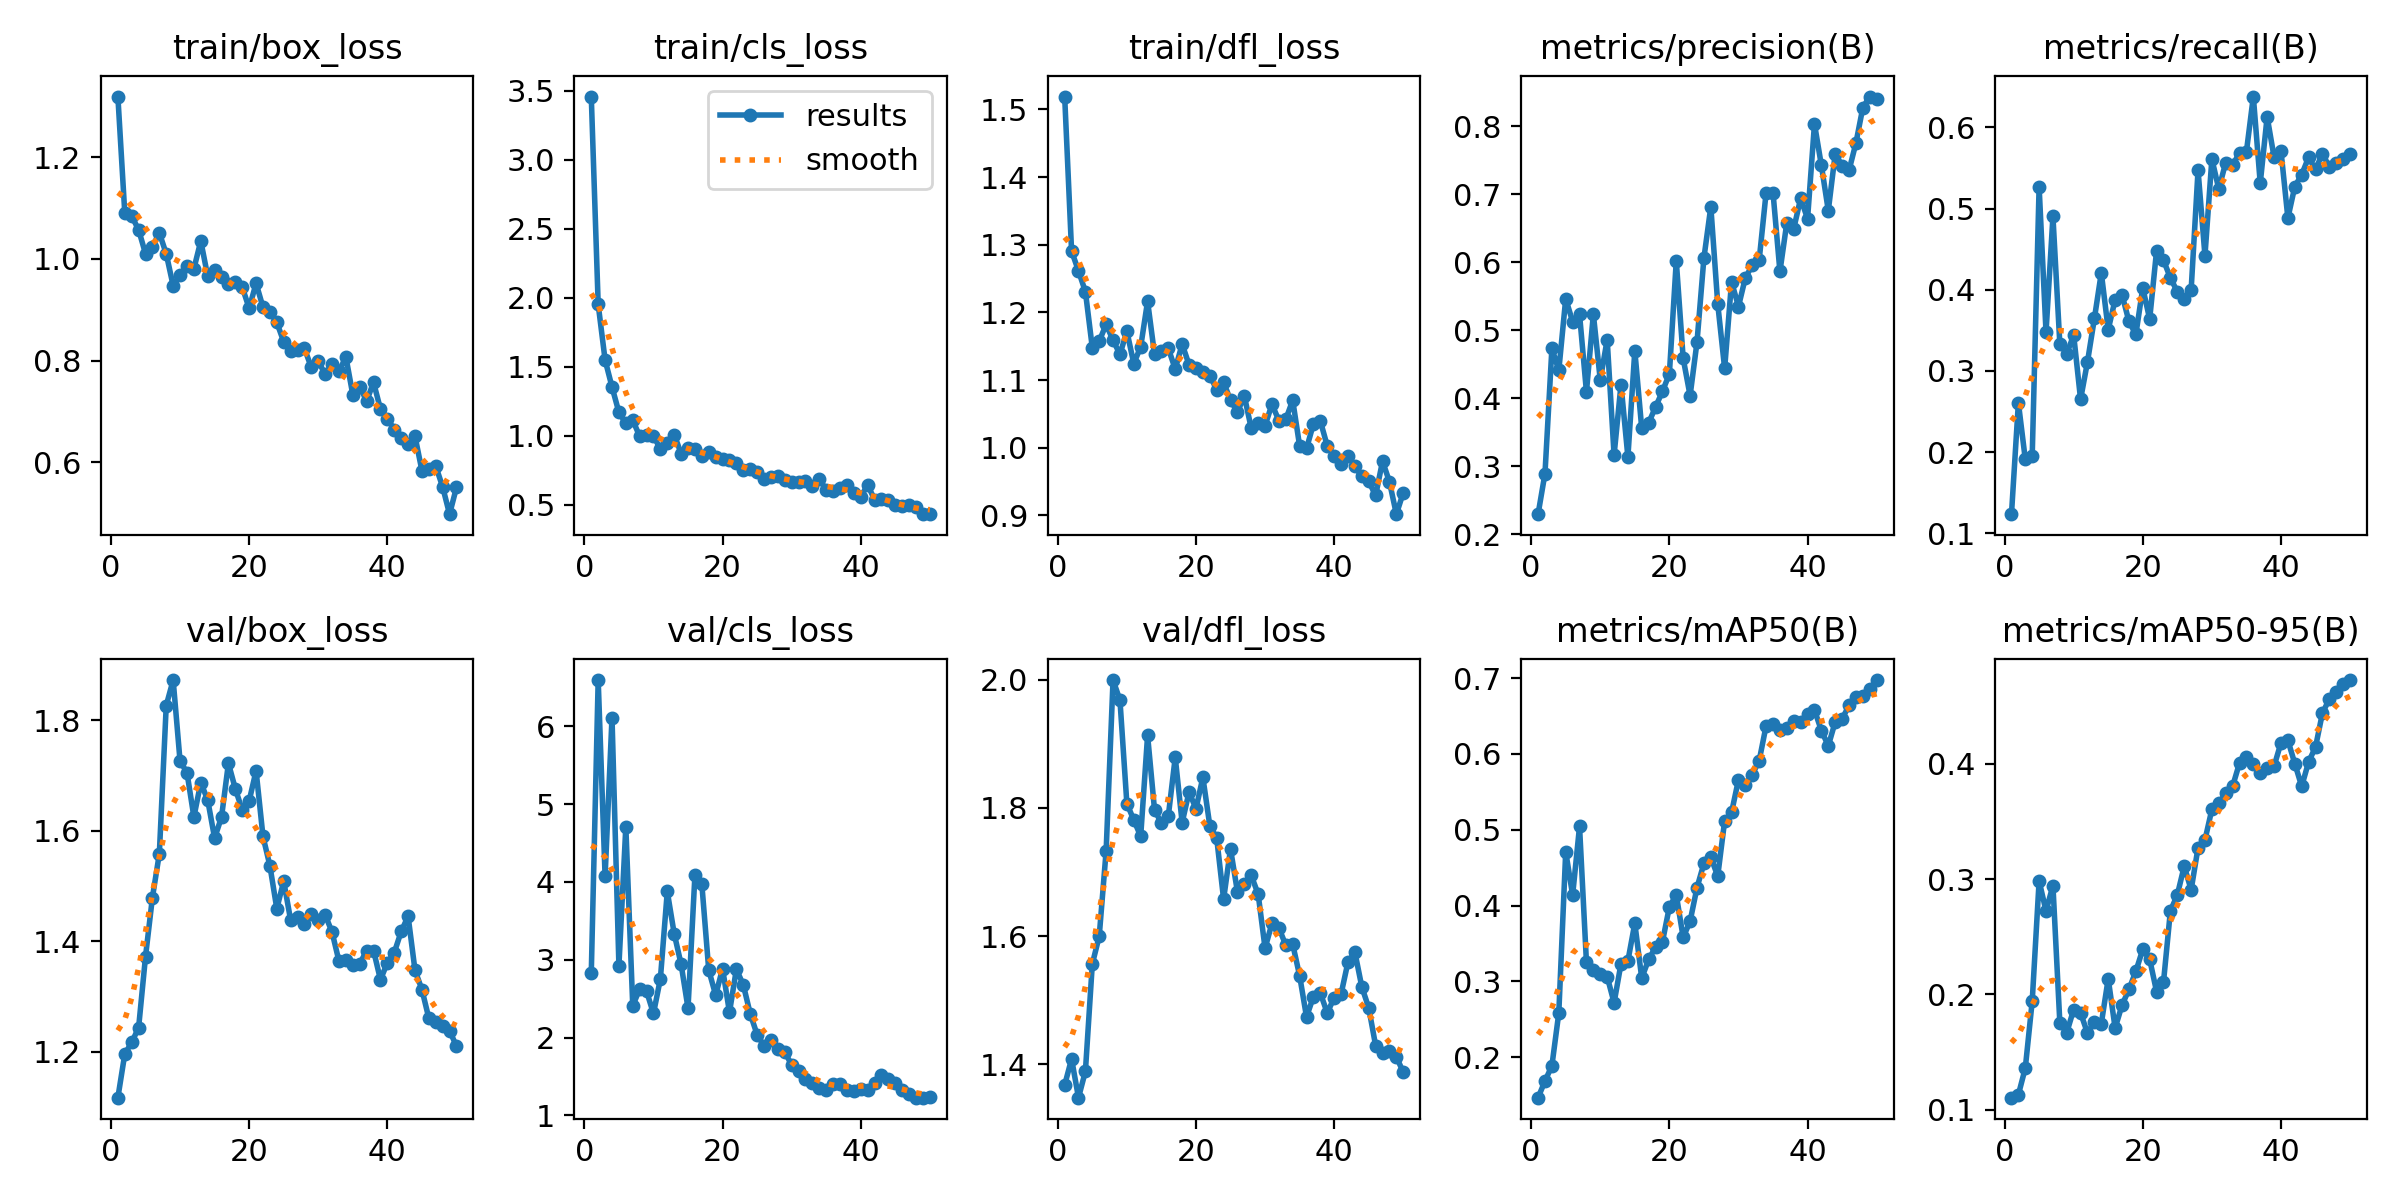

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/13 /content/datasets/Вино-1/test/images/2024-11-26_20-37-42_png.rf.0018712b809981e9cc5275512dcba4f5.jpg: 640x640 8 wine bottles, 11 wine labels, 613.5ms
image 2/13 /content/datasets/Вино-1/test/images/2024-11-26_20-39-12_png.rf.b192d547569adea06076814e772a4355.jpg: 640x512 14 wine bottles, 11 wine labels, 443.6ms
image 3/13 /content/datasets/Вино-1/test/images/2024-11-26_20-53-19_png.rf.7cab58deb43c97553be8faf7a45491f1.jpg: 448x640 4 wine bottles, 2 wine labels, 390.1ms
image 4/13 /content/datasets/Вино-1/test/images/2024-11-26_20-55-19_png.rf.b17791aa74d93480df773761e3d82fc6.jpg: 384x640 1 wine label, 349.6ms
image 5/13 /content/datasets/Вино-1/test/images/2024-11-26_20-55-58_png.rf.6bb49b9ab4f6606b1ae423c072d946ab.jpg: 352x640 8 wine bottles, 4 wine labels, 326.7ms
image 6/13 /content/datasets/Вино-1/test/images/20

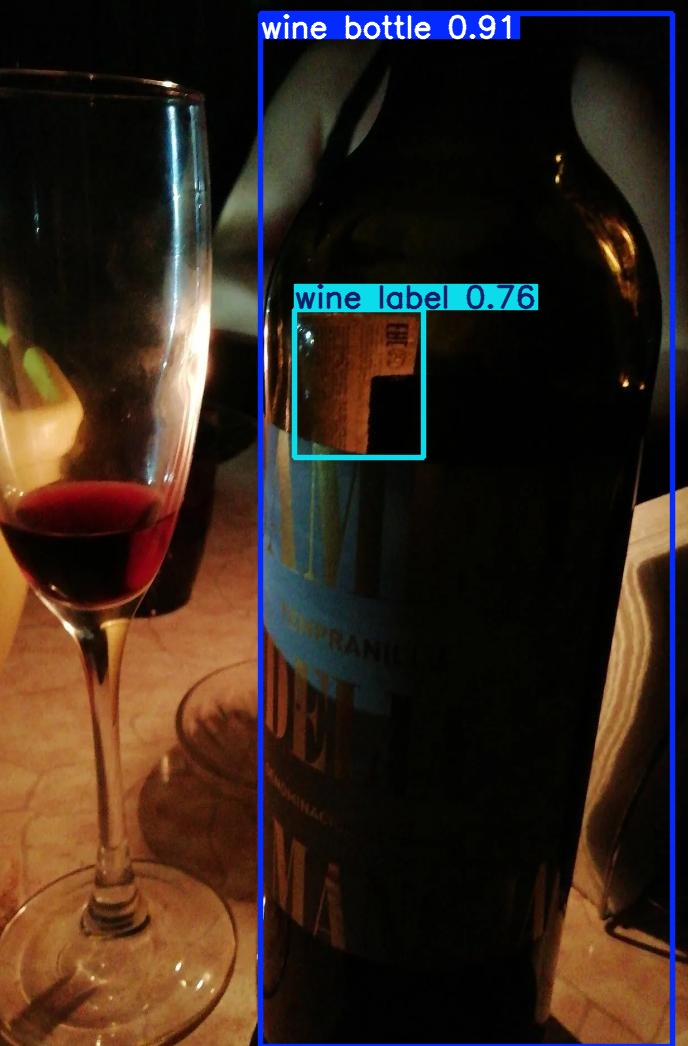

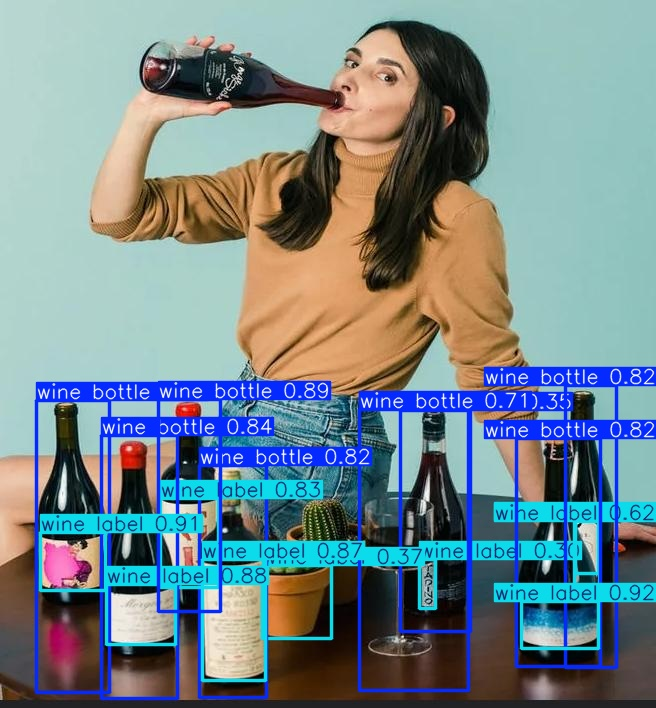

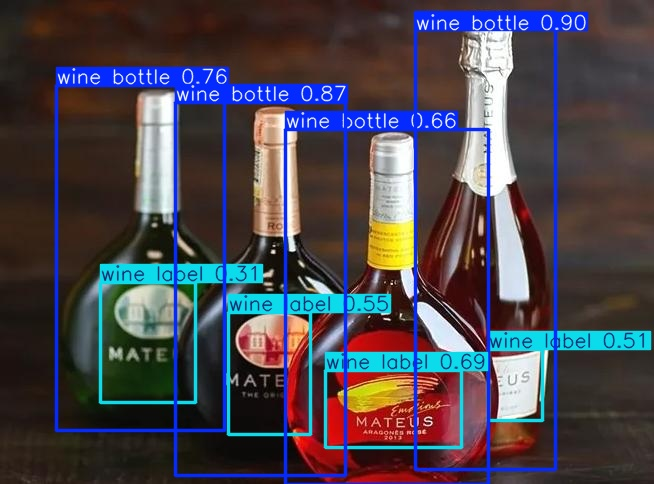

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
!pip install inference

Running inference on 2024-11-26_21-11-02_png.rf.a5ff9cbb95efc4af761cbaf56b658b4e.jpg
Running inference on 2024-11-26_21-13-27_png.rf.b00fd4930757d35a76deb436a4085c1f.jpg
Running inference on 2024-11-26_21-09-16_png.rf.d8f3c7984d3b73144f003678dbfd75e9.jpg
Running inference on 2024-11-26_20-55-58_png.rf.6bb49b9ab4f6606b1ae423c072d946ab.jpg


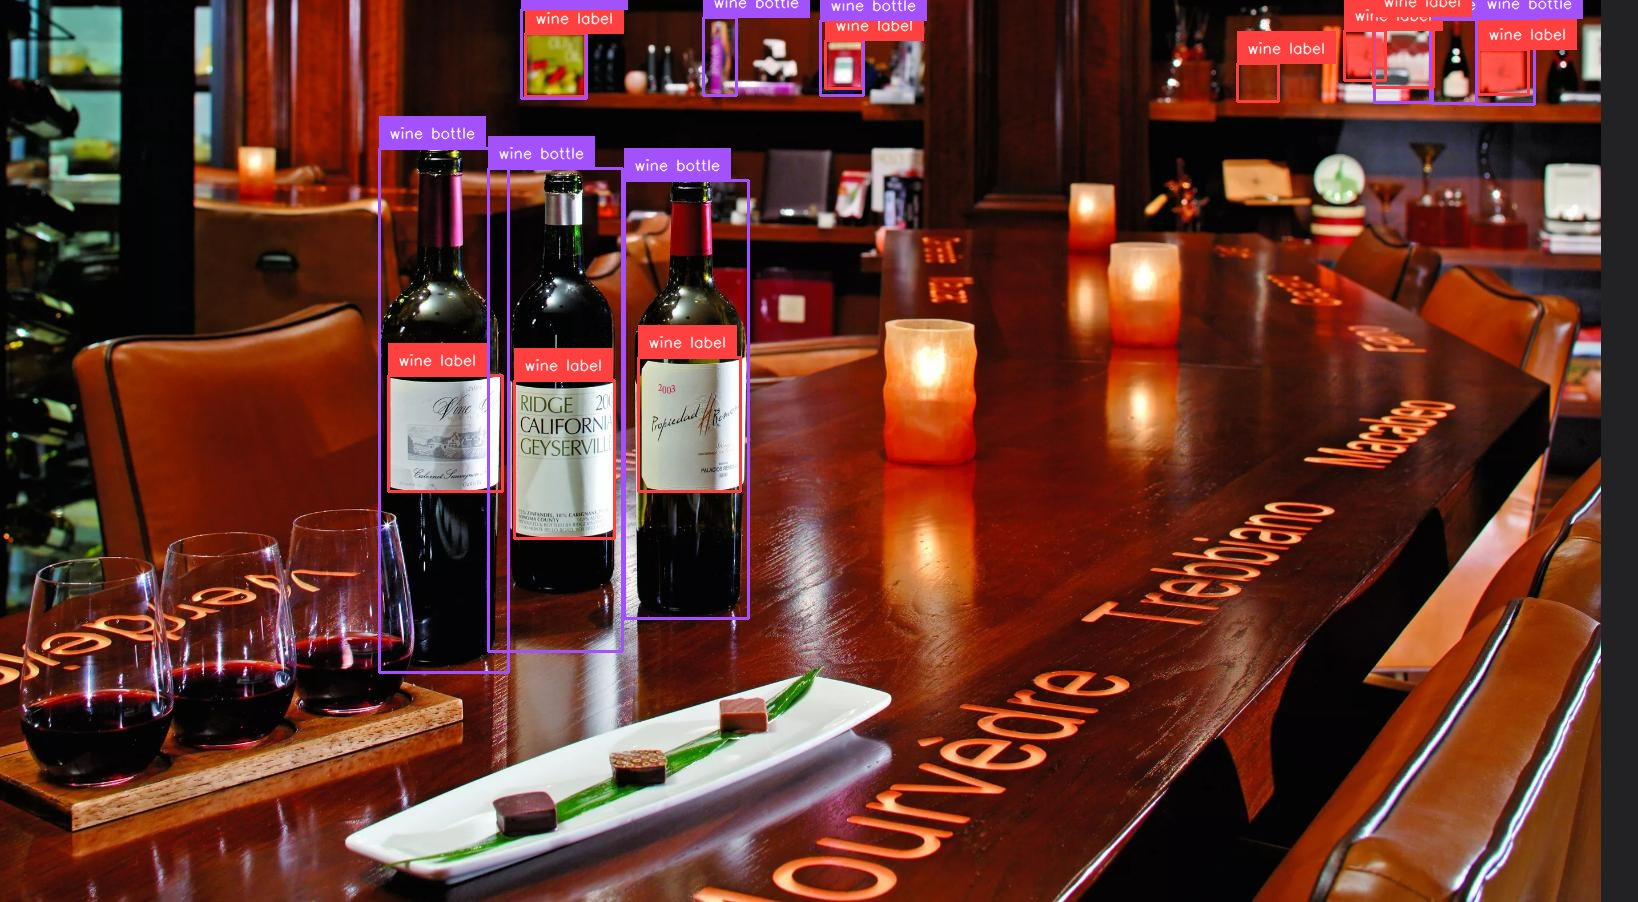

In [ ]:
import cv2
import supervision as sv
from inference import get_model

model_id = project.id.split("/")[1] + "/" + dataset.version
model = get_model(model_id, "<ROBOFLOW_API_KEY>")

test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)
for img_name in random.sample(test_images, min(4, len(test_images))):
    print("Running inference on " + img_name)
image = cv2.imread(os.path.join(test_set_loc, img_name))
results = model.infer(image, confidence=0.4, overlap=30)[0]
detections = sv.Detections.from_inference(results)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
annotated_image = box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
_, ret = cv2.imencode('.jpg', annotated_image)
i = IPython.display.Image(data=ret)
IPython.display.display(i)